# I. Algorithm 


In [49]:
!pip install mlxtend 
# Installing mlxtend for plotting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 20.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 45.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # enables 3D plotting
from mlxtend.plotting import plot_decision_regions

In [301]:
class Perceptron(object):
    weights = None
    bias = None

    def activate(self, preactivation):
        if preactivation > 0:
            return 1
        else:
            return -1

    def predict(self, signal):

        preactivation = signal @ self.weights + self.bias
        return self.activate(preactivation)
    
    def update(self, actual, predicted, signal):
        '''
        Updates the weights of Perceptron
        '''
        self.weights = self.weights - 1/2 * (predicted - actual) * signal.T
        self.bias = self.bias - 1/2 * (predicted - actual)

    def cost_function(self, actual, predicted):
        '''
        Returns 1 if actual = predicted, 0 otherwise
        '''
        return(actual != predicted)
    def train(self, X, y, epochs=20):
        '''
        Trains the perceptron over the given dataset (X, y) for a specified number of epochs.
        '''
        # Initialize weights and bias if not already set
        if self.weights is None:
            self.weights = np.zeros(X.shape[1])
        if self.bias is None:
            self.bias = 0
        
        epoch_error = np.zeros((epochs, ))

        for epoch in range(epochs):
            # Going through the training data
            for i in range(len(X)):
                signal = X[i]
                actual = y[i]
                predicted = self.predict(signal)
                # Updating weights
                if self.cost_function(actual, predicted):
                    self.update(actual, predicted, signal)
                    epoch_error[epoch] += 1
            if epoch % 10 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Misclassifications: {epoch_error[epoch]}")
            if epoch_error[epoch] <= len(X)/20: # Stop training when less than 5% error
                print("Training converged.")
                break
        return epoch_error

# II. Application to Data Set

In [174]:
game_data = pd.read_csv("../bgg_dataset.csv",delimiter=";")
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  object 
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  object 
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 2.2+ MB


In [171]:
game_data.head(6)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,"8,79",1,"3,86",68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,"8,61",2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,"8,66",3,"3,91",28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,"8,43",4,"3,24",87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,"8,70",5,"4,22",16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
5,291457.0,Gloomhaven: Jaws of the Lion,2020.0,1,4,120,14,8392,"8,87",6,"3,55",21609.0,"Action Queue, Campaign / Battle Card Driven, C...","Strategy Games, Thematic Games"


As you can see, the Rating Average and Complexity Average columns have commas instead of decimal points. We need to clean this.

In [175]:
game_data['Complexity Average'] = game_data['Complexity Average'].str.replace(',', '.').astype(float)
game_data['Rating Average'] = game_data['Rating Average'].str.replace(',', '.').astype(float)

In [280]:

game_cleaned = game_data[['Rating Average','Complexity Average','Min Age','Play Time','Min Players','BGG Rank','Domains']]

# top 100 games only
game_cleaned = game_cleaned[game_cleaned['BGG Rank'] <= 100]
#game_cleaned = game_cleaned[game_cleaned['Play Time'] < 700]

#game_cleaned = game_cleaned[game_cleaned['playing_time'] > 0]

game_cleaned.dropna(inplace = True)

# Less than 13 = 1 (Child), Greater than 13 = -1 (Teen)

#game_cleaned = game_cleaned[game_cleaned['category'].str.contains('Adventure')]

#game_cleaned = game_cleaned[game_cleaned['mechanic'].str.contains('Trick-taking')]

game_cleaned['short'] = np.where(game_cleaned['Play Time'] <= 60, 1, -1)

short = game_cleaned[game_cleaned['short'] == 1]
long = game_cleaned[game_cleaned['short'] == -1]


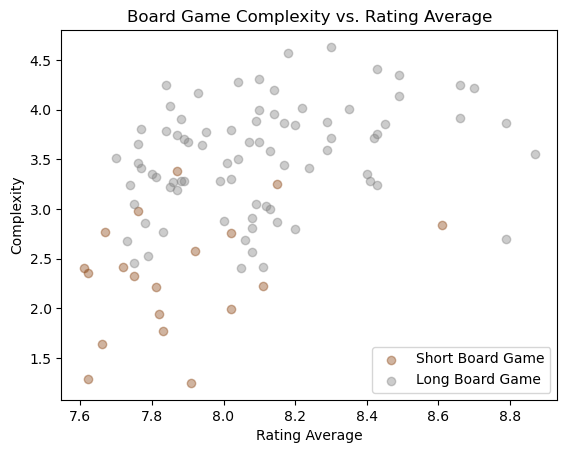

In [285]:
# Plot short board games
plt.scatter(short['Rating Average'], short['Complexity Average'], color='saddlebrown', label='Short Board Game', alpha=0.4)

# Plot long board games
plt.scatter(long['Rating Average'], long['Complexity Average'], 
            color='gray', label='Long Board Game', alpha=0.4)

# Labels and title
plt.xlabel('Rating Average')
plt.ylabel('Complexity')
plt.title('Board Game Complexity vs. Rating Average')
# Add legend
plt.legend()
# Show plot
plt.show()

We can see some type of relationship where short board games tend to have lower complexity and lower rating averages. We will attempt to use our perceptron to come up with a board game classifier.

In [302]:
X_train = game_cleaned[['Rating Average','Complexity Average']].to_numpy()
y_train = game_cleaned['short'].to_numpy()

p = Perceptron()
errors = p.train(X_train,y_train, epochs = 400)

Epoch 1/400, Misclassifications: 27.0
Epoch 11/400, Misclassifications: 16.0
Epoch 21/400, Misclassifications: 16.0
Epoch 31/400, Misclassifications: 14.0
Epoch 41/400, Misclassifications: 14.0
Epoch 51/400, Misclassifications: 12.0
Epoch 61/400, Misclassifications: 14.0
Epoch 71/400, Misclassifications: 10.0
Epoch 81/400, Misclassifications: 15.0
Epoch 91/400, Misclassifications: 14.0
Epoch 101/400, Misclassifications: 14.0
Epoch 111/400, Misclassifications: 14.0
Epoch 121/400, Misclassifications: 10.0
Epoch 131/400, Misclassifications: 18.0
Epoch 141/400, Misclassifications: 12.0
Epoch 151/400, Misclassifications: 14.0
Epoch 161/400, Misclassifications: 12.0
Epoch 171/400, Misclassifications: 12.0
Epoch 181/400, Misclassifications: 10.0
Epoch 191/400, Misclassifications: 18.0
Epoch 201/400, Misclassifications: 18.0
Epoch 211/400, Misclassifications: 14.0
Epoch 221/400, Misclassifications: 14.0
Epoch 231/400, Misclassifications: 16.0
Epoch 241/400, Misclassifications: 12.0
Epoch 251/4

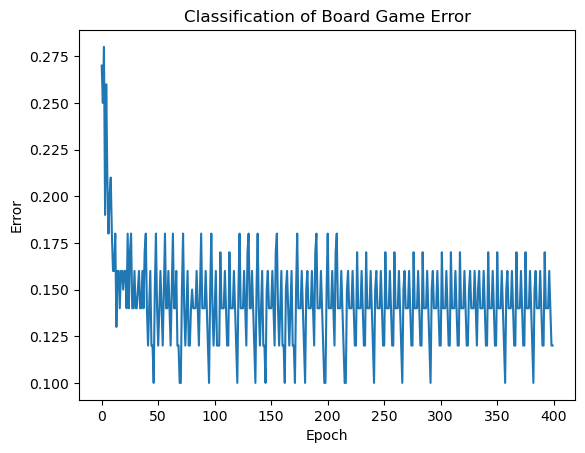

In [299]:
plt.plot([err / 100 for err in errors])
plt.title("Classification of Board Game Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.show()

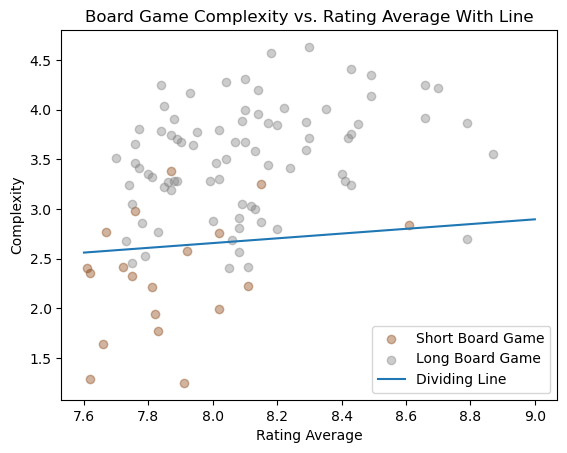

In [311]:
p.weights

# Plot short board games
plt.scatter(short['Rating Average'], short['Complexity Average'], color='saddlebrown', label='Short Board Game', alpha=0.4)

# Plot long board games
plt.scatter(long['Rating Average'], long['Complexity Average'], 
            color='gray', label='Long Board Game', alpha=0.4)

# Plotting linear divider based on weights
x = np.linspace(7.6, 9, 400)
y = -1/p.weights[1] * (p.weights[0]*x + p.bias)
plt.plot(x,y, label = 'Dividing Line')

# Labels and title
plt.xlabel('Rating Average')
plt.ylabel('Complexity')
plt.title('Board Game Complexity vs. Rating Average With Line')
# Add legend
plt.legend()
# Show plot
plt.show()

